In [1]:
import data
import importlib as I
I.reload(data)

<module 'data' from 'D:\\Users\\Macintoshx\\Documents\\GitHub\\datasets for practical_seq2seq\\datasets\\seq2seq\\twitter\\data.py'>

In [101]:
idx_q, idx_a, w2idx = data.process_data()


>> Read lines from file

:: Sample from read(p) lines
['in the future our robot overlords will honor acts of heroism such as preformed by', "stop squirming. you're making it hurt worse.", 'you are a keyboard warrior champion', "it's late september, which can mean only one thing: summer has finally come to the bay area."]

>> Filter lines
['in the future our robot overlords will honor acts of heroism such as preformed by', 'stop squirming youre making it hurt worse', 'you are a keyboard warrior champion', 'its late september which can mean only one thing summer has finally come to the bay area']

>> 2nd layer of filtering
29% filtered from original data

q : betting android phones wont have headphone jokes in the next 18 months ; a : i hope youre right

q : avast ye mateys it is almost time for a perfect day fer it ; a : imagine a pirate twitter chat

>> Segment lines into words

:: Sample from segmented list of words

q : ['betting', 'android', 'phones', 'wont', 'have', 'headphone', '

ValueError: binary mode doesn't take an encoding argument

In [103]:
w2idx

NameError: name 'w2idx' is not defined

**29% filtered from original data**

In [5]:
from matplotlib import pyplot as plt
%matplotlib inline

In [11]:
freq = [ freq_ for name, freq_ in freq_dist.most_common(10000) ]

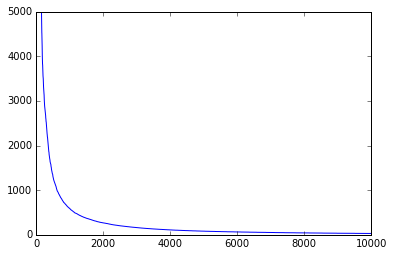

In [16]:
plt.plot(list(range(len(freq))), freq)
axes = plt.gca()
#axes.set_xlim([xmin,xmax])
axes.set_ylim([0,5000])
plt.show()

In [36]:
# number of unknowns
num_unk = (idx_a == w2idx[data.UNK]).sum() + (idx_q == w2idx[data.UNK]).sum()

In [37]:
# number of words in vocabulary (excluding zeros)
num_words = (idx_a > w2idx[data.UNK]).sum() + (idx_q > w2idx[data.UNK]).sum()

## % of unknowns : 10.83% for a vocb size of 6000

In [38]:
(num_unk/num_words)*100

10.831357510060943

'unk'

## index_

In [2]:
def chain(*iterables):
    # chain('ABC', 'DEF') --> A B C D E F
    for it in iterables:
        for element in it:
            yield element

In [122]:
dict((x,x) for x in chain('ABC') )

{'A': 'A', 'B': 'B', 'C': 'C'}

In [24]:
vocab = ["I am fine thanks",'123', '4d5f']
UNK = 'unk'

In [25]:
index2word = ['_'] + [UNK] + [ x[0] for x in vocab ]

In [26]:
index2word

['_', 'unk', 'I', '1', '4']

In [40]:
import nltk
import itertools
freq_dist = nltk.FreqDist(itertools.chain("I am fine thanks"))
print(len(freq_dist))
freq_dist

12


FreqDist({' ': 3,
          'I': 1,
          'a': 2,
          'e': 1,
          'f': 1,
          'h': 1,
          'i': 1,
          'k': 1,
          'm': 1,
          'n': 2,
          's': 1,
          't': 1})

In [45]:
vocab = freq_dist.most_common(2)
vocab

[(' ', 3), ('a', 2)]

In [36]:
index2word = ['_'] + [UNK] + [ x[0] for x in vocab ]

In [43]:
print(len(index2word))
index2word

14


['_', 'unk', ' ', 'a', 'n', 's', 't', 'h', 'e', 'I', 'k', 'i', 'm', 'f']

In [119]:
word2index = dict((w,i) for i,w in enumerate(index2word) )
word2index

{' ': 2,
 'I': 9,
 '_': 0,
 'a': 3,
 'e': 8,
 'f': 13,
 'h': 7,
 'i': 11,
 'k': 10,
 'm': 12,
 'n': 4,
 's': 5,
 't': 6,
 'unk': 1}

In [48]:
list(enumerate(index2word))

[(0, '_'),
 (1, 'unk'),
 (2, ' '),
 (3, 'a'),
 (4, 'n'),
 (5, 's'),
 (6, 't'),
 (7, 'h'),
 (8, 'e'),
 (9, 'I'),
 (10, 'k'),
 (11, 'i'),
 (12, 'm'),
 (13, 'f')]

In [53]:
len("I am fine thanks")

8

### filter_data, data.py

In [59]:
test_senten = ['yeah i m preparing myself to drop a lot on this man, but definitely need something reliable',
'yeah dude i would definitely consider a daniel defence super reliable and they are just bad ass',
'i m about to meet my mans ex friend with benefit, tune in next week to see if i have to put hands on',
'i m dead not looking forward to this',
'shouldn t the supporter s natural answer to s hashtag be ?',
'or just insert itl to make .',
'you want to turn twitter followers into blog readers.',
'how do you do this?',
'besides if trump say his condolences it won t sound genuine, ex: (dwayne wade cousin) it will sound all political and petty',
'yea you right. but we do live in a world where republicans will harass obama about a birth certificate but won t say'
]

In [60]:
len(test_senten)

10

In [72]:
filtered_q, filtered_a = [], []
for i in range(0, len(test_senten), 2):
    qlen1, alen1 = len(test_senten[i].split(' ')), len(test_senten[i+1].split(' '))
    if qlen1 >= 0 and qlen1 <= 20:
        if alen1 >= 3 and alen1 <= 20:
            filtered_q.append(test_senten[i])
            filtered_a.append(test_senten[i+1])
            


In [73]:
filtered_q

['yeah i m preparing myself to drop a lot on this man, but definitely need something reliable',
 'shouldn t the supporter s natural answer to s hashtag be ?',
 'you want to turn twitter followers into blog readers.']

In [75]:
filtered_a

['yeah dude i would definitely consider a daniel defence super reliable and they are just bad ass',
 'or just insert itl to make .',
 'how do you do this?']

In [83]:
filt_data_len = len(filtered_q)
raw_data_len = len(test_senten)//2
filtered = int((raw_data_len - filt_data_len)*100/raw_data_len)
filtered

In [87]:
print(str(filtered) + '% filtered from original data')

40% filtered from original data


In [89]:
a , q = [],[]
for i in range(0, len(test_senten), 2):
    q.append(i)
    a.append(i+1)
    print(a,'->',q)

[1] -> [0]
[1, 3] -> [0, 2]
[1, 3, 5] -> [0, 2, 4]
[1, 3, 5, 7] -> [0, 2, 4, 6]
[1, 3, 5, 7, 9] -> [0, 2, 4, 6, 8]


In [90]:
data_len = len(test_senten)

In [91]:
import numpy as np
idx_q = np.zeros([data_len, 20], dtype=np.int32) 
idx_a = np.zeros([data_len, 20], dtype=np.int32)
idx_q 

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
for i in range(data_len):
    q_indices = pad_seq(test_senten[i], w2idx, 20)
    a_indices = pad_seq(test_senten[i], w2idx, 20)

    print(len(idx_q[i]), len(q_indices))
    print(len(idx_a[i]), len(a_indices))
    idx_q[i] = np.array(q_indices)
    idx_a[i] = np.array(a_indices)


In [110]:
from array import *
my_array = array('i',[1,2,3,4])

In [128]:
dict((x,x) for x in my_array  )

{1: 1, 2: 2, 3: 3, 4: 4}

In [131]:
idx_a = np.array(a)
idx_a

array([1, 3, 5, 7, 9])

### data_util.py

In [2]:
mygenerator = (x*x for x in range(3))
mygenerator

<generator object <genexpr> at 0x000001F8E05F05C8>

In [3]:
for x in mygenerator:
    print(x)

0
1
4


In [4]:
def createGenerator():
    mylist = range(3)
    for i in mylist:
        yield i*i

In [5]:
mygenerator = createGenerator()
print(mygenerator)

<generator object createGenerator at 0x000001F8E11C4F10>


In [6]:
for i in mygenerator:
    print(i)

0
1
4


In [12]:
class Bank(): # let's create a bank, building ATMs
    crisis = False
    def create_atm(self):
        while not self.crisis:
            yield "$100"

In [13]:
hsbc = Bank()
corner_street_atm = hsbc.create_atm()

In [16]:
print([next(corner_street_atm) for cash in range(10)])

['$100', '$100', '$100', '$100', '$100', '$100', '$100', '$100', '$100', '$100']


In [176]:
brand_new_atm = Bank().create_atm()

In [211]:
x = np.array([['a','b','c','d'], ['e','f','g','h']])
print(x)

[['a' 'b' 'c' 'd']
 ['e' 'f' 'g' 'h']]


In [212]:
print(x.T)

[['a' 'e']
 ['b' 'f']
 ['c' 'g']
 ['d' 'h']]


In [220]:
import random as random
random.sample(range(20), 5)

[14, 1, 16, 11, 18]

In [250]:
import tensorflow as tf
x = tf.placeholder(tf.int32, shape=[None,])#
y = tf.matmul(x, x)

with tf.Session() as sess:
#     print(sess.run(y))  # ERROR: will fail because x was not fed.
    rand_array = np.random.rand(10,10)
    print(sess.run(y, feed_dict={x: rand_array}))  # Will succeed.

ValueError: Shape must be rank 2 but is rank 1 for 'MatMul_26' (op: 'MatMul') with input shapes: [?], [?].

In [252]:
a = ['a','b','c','d']

In [255]:
print(np.array([[[1., 2., 3.]], [[7., 8., 9.]]]))

[[[ 1.  2.  3.]]

 [[ 7.  8.  9.]]]


In [269]:
b = [ tf.zeros_like(a, dtype=tf.int64, name='GO') ]

In [270]:
sess = tf.Session()
sess.run(b)

[array([0, 0, 0, 0], dtype=int64)]

##  new way

In [2]:
import tensorflow as tf

sample_input = tf.constant([[1,2,3]],dtype=tf.float32)

LSTM_CELL_SIZE = 2
lstm_cell = tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(LSTM_CELL_SIZE, state_is_tuple=True)

state = (tf.zeros([1,LSTM_CELL_SIZE]),)*2

output, state_new = lstm_cell(sample_input, state)

init_op = tf.global_variables_initializer()


####  input

In [27]:
sess.run(init_op)
print (sess.run(sample_input))
print(len(sess.run(sample_input)))

[[ 1.  2.  3.]]
1


#### output

In [19]:
sess = tf.Session()
sess.run(init_op)
print (sess.run(output))

[[ 0.54442555  0.00535932]]


#### Ori stat 

In [24]:
print (sess.run(state))
print(len(sess.run(state)))

(array([[ 0.,  0.]], dtype=float32), array([[ 0.,  0.]], dtype=float32))
2


#### state after lstm_cell(sample_input, state), 在新state里考虑旧的信息

In [25]:
print (sess.run(state_new))
print(len(sess.run(state_new)))

LSTMStateTuple(c=array([[ 0.82578313,  0.01324744]], dtype=float32), h=array([[ 0.54442555,  0.00535932]], dtype=float32))
2


## Old way

In [9]:
lstm_cell2 = tf.contrib.rnn.core_rnn_cell.BasicLSTMCell(LSTM_CELL_SIZE, state_is_tuple=False)
state2 = tf.zeros([1,LSTM_CELL_SIZE*2])

In [15]:
sample_input2 = tf.constant([[1,2,3]],dtype=tf.float32)

In [17]:
output2, state_new2 = lstm_cell(sample_input2, state2)

TypeError: 'Tensor' object is not iterable.